<a href="https://colab.research.google.com/github/eileenrmartin/introClimateDataSci/blob/main/intermediate_climate_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deliverables:

1. intro to linear regression
2. test of linear regression on ice core data 
3. intro to using linear regression for parameters of other types of functions
4. test of different non-linear regressions on ice core data
5. questions for student exploration

###Introduction

In our previous notebook, we were able to 
* download ice core data that measures the concentration of CO2 on Earth 
* read and visualize that data in several ways
* understand the range of values in different time intervals

We might also want to be able to quantify trends in these data. In this notebook you will learn some foundational tools for quantitatively estimating trends in these data. For example, one might wonder: 
* Is the change in CO2 concentration the same each year (i.e. a linear trend) or does this change vary significantly from year to year (i.e. a non-linear trend)? 
* If these data are following a non-linear trend, could we still find a way to estimate and predict the change?  

**Data Science Learning Goals:** 
1. Understand what it means to fit a function to time series data.
2. Be able to carry out and compare multiple types of regression on the same data. 

**Climate Science Learning Goals:** 
1. Be able to *quantitatively* relate seasonal and long-term trends in atmospheric CO2 to fluxes in the carbon cycle
2. Be able to make approximate predictions about future trends in atmospheric CO2 concentrations

## Linear Regression: A Simple Way to Describe (some) Trends in Data

TO ADD: some text about why we often want to fit data with a line.



In [46]:
import pandas as pd                    # lets us access tools for working with many data values (data frames)
import matplotlib.pyplot as plt        # lets us access tools for plotting
%matplotlib inline                   
# line above ensures that plots are interative (e.g. can zoom with buttons)
import sklearn as skl                  # lets us access tools for data fitting and machine learning

*Grab the ice core data.*

In [3]:
#Data from 800,000 to 1958
!wget https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-co2-2008.txt

#Data from 1958 to today
!wget https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv

--2022-06-21 20:55:11--  https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-co2-2008.txt
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.177, 205.167.25.172, 205.167.25.167, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107462 (105K) [text/plain]
Saving to: ‘edc-co2-2008.txt’

edc-co2-2008.txt    100%[===================>] 104.94K  --.-KB/s    in 0.09s   

2022-06-21 20:55:11 (1.19 MB/s) - ‘edc-co2-2008.txt’ saved [107462/107462]

--2022-06-21 20:55:12--  https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv
Resolving scrippsco2.ucsd.edu (scrippsco2.ucsd.edu)... 169.228.224.138
Connecting to scrippsco2.ucsd.edu (scrippsco2.ucsd.edu)|169.228.224.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77907 (76K) [text/csv]
Saving to: ‘monthly_in_situ_co2_mlo.csv’

monthly_in_

*Read the files you downloaded and store the data in Pandas data frames. One is a text (txt) file and the other is a comma-separated-value (csv) file, so they use different methods to read.*


In [30]:


csvFilename = 'monthly_in_situ_co2_mlo.csv'
headersRaw = pd.read_csv(csvFilename, skiprows=54, nrows=3, header=None)   # read the headers, with long ones on multiple lines
headers = headersRaw.sum(axis=0)    # add (append) the text for each header that's split across rows
print("The "+str(headers.size)+" headers are: \n")
print(headers)
headersClean = [thisHdr.strip() for thisHdr in list(headers)]
recentData = pd.read_csv(csvFilename, skiprows=57, names=headersClean)   # read the actual data values
print("The number of (measurement times, attributes) in these data is: "+str(recentData.shape))

The 10 headers are: 

0                             Yr        
1                               Mn      
2                   Date           Excel
3               Date                    
4                    CO2           [ppm]
5         seasonally  adjusted    [ppm] 
6              fit                 [ppm]
7        seasonallyadjusted fit    [ppm]
8               CO2   filled       [ppm]
9     seasonallyadjusted filled    [ppm]
dtype: object
The number of (measurement times, attributes) in these data is: (780, 10)


*Let's take another look at some of our data. What trends do you see?*

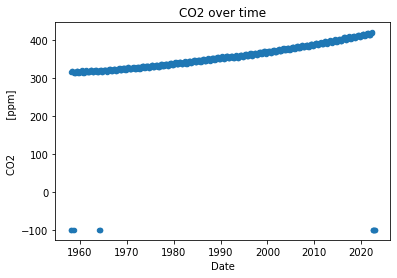

In [49]:
ax = recentData.plot.scatter(x='Date',y='CO2           [ppm]')
ax.set_title("CO2 over time")
plt.show()

*Notice that there are a few valus that don't make any sense, -100 parts of CO2 per million? When looking at these points by eye, we can easily just ignore these. But when we want to instruct the computer to automatically analyze these data for trends, we've got to tell it which points to ignore. This is often referred to as* **pre-processing** *or* **data cleaning.** 

*In this case, we want to ignore data points that have a negative CO2 concentration.*